# WIP

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import gc

In [2]:
# Path where the data is stored
SOURCE_PATH = '../../data'
# Directory inside SOURCE_PATH where the original data is stored
ORIGINAL_DATA_DIR = '/EXOSAFE'

# Number of force cells in the robotic leg
N_CELLS = 8

# Experiment params
DATE_EXPERIMENTS = '24022021'
N_EXPERIMENTS = 15

In [3]:
n_exp = 1
sheets = ['Parameters', 'RawForces', 'ForceCells', 'H3raw', 'H3processed', 'Leg-Replica']

# Load all the experiment data
data_dict = pd.read_excel(SOURCE_PATH + ORIGINAL_DATA_DIR + '/' + DATE_EXPERIMENTS + '/0{}-'.format(n_exp) + DATE_EXPERIMENTS + '.xlsx', sheet_name=sheets)

In [10]:
raw_forces_df = data_dict[sheets[1]]
forces_df = data_dict[sheets[2]]

In [5]:
raw_forces_df.info()

raw_forces_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186361 entries, 0 to 186360
Data columns (total 24 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   F1x     186361 non-null  float64
 1   F1y     186361 non-null  float64
 2   F1z     186361 non-null  float64
 3   F2x     186361 non-null  float64
 4   F2y     186361 non-null  float64
 5   F2z     186361 non-null  float64
 6   F3x     186361 non-null  float64
 7   F3y     186361 non-null  float64
 8   F3z     186361 non-null  float64
 9   F4x     186361 non-null  float64
 10  F4y     186361 non-null  float64
 11  F4z     186361 non-null  float64
 12  F5x     186361 non-null  float64
 13  F5y     186361 non-null  float64
 14  F5z     186361 non-null  float64
 15  F6x     186361 non-null  float64
 16  F6y     186361 non-null  float64
 17  F6z     186361 non-null  float64
 18  F7x     186361 non-null  float64
 19  F7y     186361 non-null  float64
 20  F7z     186361 non-null  float64
 21  F8x     18

,F1x,F1y,F1z,F2x,F2y,F2z,F3x,F3y,F3z,F4x,...,F5z,F6x,F6y,F6z,F7x,F7y,F7z,F8x,F8y,F8z
count,186361.000000,186361.000000,186361.000000,186361.000000,186361.000000,186361.000000,186361.000000,186361.000000,186361.000000,186361.000000,...,186361.000000,186361.000000,186361.000000,186361.000000,186361.000000,186361.000000,186361.000000,186361.000000,186361.000000,186361.000000
mean,-21.922774,1.277626,27.514620,16.267775,-5.497352,13.401205,10.481910,-87.917935,87.915840,7.697028,...,61.137498,-7.679995,-7.097381,26.189087,-50.360913,-9.870542,-21.217645,-5.576729,28.457707,55.980959
std,3.714246,7.181617,7.756207,2.789444,4.781090,2.503265,24.934685,13.515766,16.757673,9.888186,...,11.799232,5.998833,2.824984,7.370629,28.059413,3.820037,15.600962,13.037771,7.965202,11.278648
min,-35.856264,-26.022142,12.349168,8.894320,-23.924072,7.250109,-48.703748,-132.771200,39.240960,-31.431680,...,24.805307,-29.039060,-14.032612,9.249959,-91.802522,-17.263500,-54.122057,-29.744000,-3.419828,41.077600
25%,-24.627956,1.855181,21.975502,14.857440,-9.420926,11.414999,-7.280164,-96.226600,78.640728,3.138592,...,53.544739,-10.736428,-9.186685,21.885102,-69.251070,-12.621435,-30.673043,-13.055546,25.832556,50.280800
50%,-20.529992,3.354137,26.306239,16.655480,-5.135782,13.203227,10.803228,-85.052000,91.874912,9.038144,...,63.777830,-6.243652,-7.372908,24.637772,-59.313142,-10.402360,-23.274863,-8.322794,29.610584,52.264800
75%,-19.118660,4.896541,31.160227,18.408000,-1.584768,15.083159,27.441000,-78.444000,100.024848,14.593096,...,69.263914,-3.231320,-5.553618,28.561296,-34.754993,-7.547550,-9.813392,0.936340,32.793360,55.298400
max,-14.045800,13.113644,56.695618,26.635740,5.049592,22.511183,69.994796,-50.537000,128.562240,26.723016,...,89.413874,2.033116,8.261960,54.475164,29.104385,3.331915,27.418753,43.861300,44.394700,98.575200


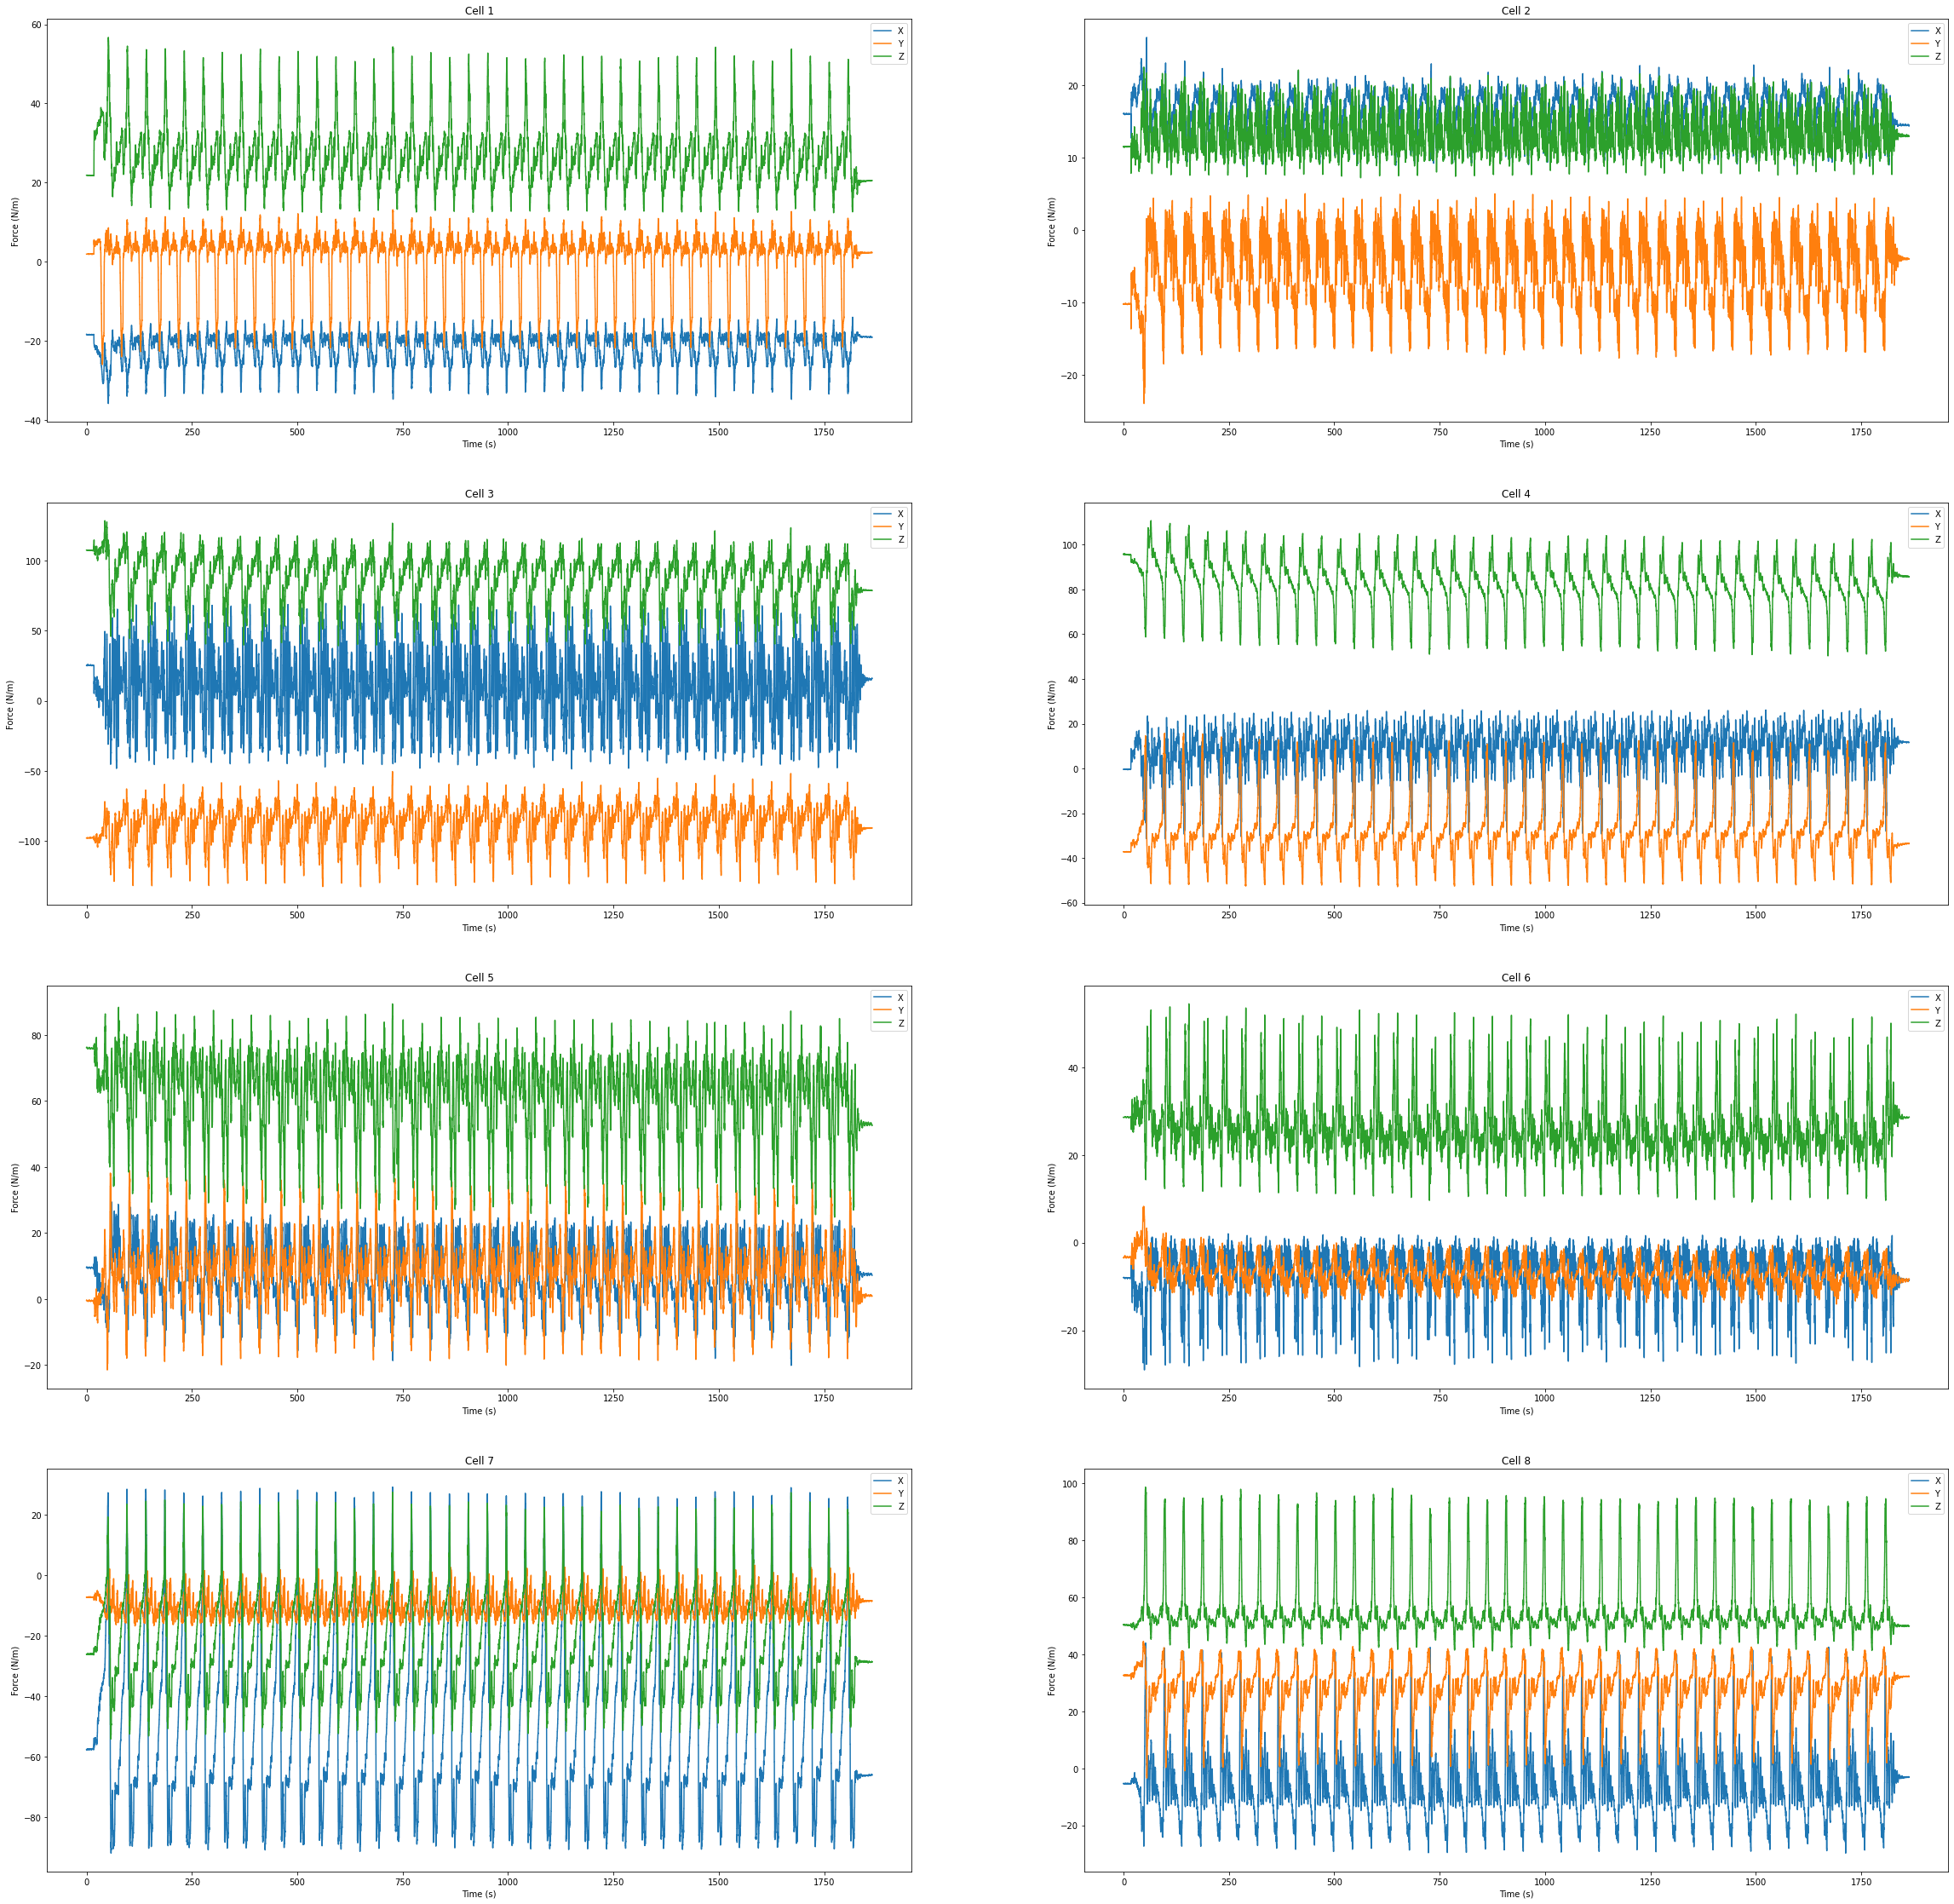

In [6]:
# Add the time of each measure (for visualization purposes only)
time_ax = [i / 100 for i in range(1, len(raw_forces_df) + 1)]

%matplotlib inline
# Plot the evolution of the forces
plt.figure(figsize=(40,40))
for i in range (1, N_CELLS + 1):
    plt.subplot(4, 2, i)
    plt.plot(time_ax, raw_forces_df['F{}x'.format(str(i))], label='X')
    plt.plot(time_ax, raw_forces_df['F{}y'.format(str(i))], label='Y')
    plt.plot(time_ax, raw_forces_df['F{}z'.format(str(i))], label='Z')
    plt.legend()
    plt.title('Cell {}'.format(str(i)))
    plt.xlabel('Time (s)')
    plt.ylabel('Force (N/m)')

plt.show()

In [7]:
# Plot only one force cell
force_cell = 1

%matplotlib widget
plt.figure(figsize=(10,7))
plt.plot(time_ax, raw_forces_df['F{}x'.format(str(force_cell))], label='X')
plt.plot(time_ax, raw_forces_df['F{}y'.format(str(force_cell))], label='Y')
plt.plot(time_ax, raw_forces_df['F{}z'.format(str(force_cell))], label='Z')
plt.legend()
plt.title('Cell {}'.format(str(force_cell)))
plt.xlabel('Time (s)')
plt.ylabel('Force (N/m)')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [8]:
len(raw_forces_df)

186361

In [9]:
len(raw_forces_df.drop_duplicates())

9054

In [20]:
raw_forces_df.iloc[0]

F1x     -18.404492
F1y       1.898629
F1z      21.841906
F2x      16.097860
F2y     -10.165932
F2z      11.548734
F3x      25.206860
F3y     -98.020200
F3z     107.569216
F4x      -0.431464
F4y     -37.255149
F4z      95.636160
F5x       9.603018
F5y      -0.416505
F5z      76.172997
F6x      -7.969884
F6y      -3.425600
F6z      28.592312
F7x     -57.565814
F7y      -7.295655
F7z     -26.153720
F8x      -5.309792
F8y      32.550400
F8z      50.332000
Time      0.010000
Name: 0, dtype: float64

In [13]:
raw_forces_df.iloc[1]

F1x     -18.404492
F1y       1.898629
F1z      21.841906
F2x      16.097860
F2y     -10.165932
F2z      11.548734
F3x      25.206860
F3y     -98.020200
F3z     107.569216
F4x      -0.431464
F4y     -37.255149
F4z      95.636160
F5x       9.603018
F5y      -0.416505
F5z      76.172997
F6x      -7.969884
F6y      -3.425600
F6z      28.592312
F7x     -57.565814
F7y      -7.295655
F7z     -26.153720
F8x      -5.309792
F8y      32.550400
F8z      50.332000
Time      0.020000
Name: 1, dtype: float64

In [11]:
len(forces_df)

17954

In [12]:
len(forces_df.drop_duplicates())

8722

In [14]:
time_ax = [i / 100 for i in range(1, len(forces_df) + 1)]
force_cell = 1

%matplotlib widget
plt.figure(figsize=(10,7))
plt.plot(time_ax, forces_df['F{}x'.format(str(force_cell))], label='X')
plt.plot(time_ax, forces_df['F{}y'.format(str(force_cell))], label='Y')
plt.plot(time_ax, forces_df['F{}z'.format(str(force_cell))], label='Z')
plt.legend()
plt.title('Cell {}'.format(str(force_cell)))
plt.xlabel('Time (s)')
plt.ylabel('Force (N/m)')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [20]:
raw_forces_df.drop_duplicates().all(axis=1)

0         True
3         True
24        True
44        True
65        True
          ... 
186265    True
186285    True
186306    True
186326    True
186347    True
Length: 9054, dtype: bool

In [21]:
raw_forces_df.duplicated(keep='first')

0         False
1          True
2          True
3         False
4          True
          ...  
186356     True
186357     True
186358     True
186359     True
186360     True
Length: 186361, dtype: bool

In [25]:
raw_forces_df.loc[~raw_forces_df.duplicated(keep='first')]

,F1x,F1y,F1z,F2x,F2y,F2z,F3x,F3y,F3z,F4x,...,F5z,F6x,F6y,F6z,F7x,F7y,F7z,F8x,F8y,F8z
0,-18.404492,1.898629,21.841906,16.09786,-10.165932,11.548734,25.206860,-98.0202,107.569216,-0.431464,...,76.172997,-7.969884,-3.425600,28.592312,-57.565814,-7.295655,-26.153720,-5.309792,32.550400,50.3320
3,-18.449836,1.909491,21.860461,16.13200,-10.242064,11.479956,25.259428,-97.9258,107.480904,-0.431464,...,76.250214,-7.981316,-3.398035,28.557419,-57.647720,-7.223685,-26.105471,-5.378582,32.526104,50.4216
24,-18.342144,1.909491,21.838195,16.10355,-10.176808,11.556376,25.193718,-97.9140,107.443056,-0.390112,...,76.235506,-7.964168,-3.447652,28.565173,-57.620418,-7.271665,-26.121554,-5.419856,32.659732,50.3576
44,-18.393156,1.920353,21.838195,16.10355,-10.155056,11.544913,25.180576,-98.0320,107.480904,-0.431464,...,76.257568,-7.929872,-3.475217,28.561296,-57.511210,-7.223685,-26.153720,-5.433614,32.635436,50.1912
65,-18.404492,1.931215,21.856750,16.12631,-10.160494,11.487598,24.970304,-98.0084,107.455672,-0.266056,...,76.275953,-7.969884,-3.442139,28.576804,-57.524861,-7.199695,-26.201969,-5.447372,32.635436,50.3576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186265,-19.152668,2.305954,20.520790,14.42500,-3.988364,13.027461,15.968034,-90.8458,78.615496,11.588184,...,52.669613,-8.610076,-8.337683,28.600066,-65.811018,-8.531140,-28.517921,-3.012206,32.307440,49.8840
186285,-19.112992,2.289661,20.498524,14.44207,-3.993802,13.046566,16.007460,-90.9048,78.653344,11.588184,...,52.687998,-8.570064,-8.232936,28.603943,-65.906575,-8.627100,-28.598336,-3.108512,32.295292,49.9096
186306,-19.067648,2.316816,20.468836,14.39086,-3.950298,13.031282,15.889182,-90.8930,78.527184,11.519264,...,52.581365,-8.627224,-8.288066,28.623328,-65.865622,-8.519145,-28.566170,-3.080996,32.258848,49.8584
186326,-19.050644,2.267937,20.461414,14.44207,-3.993802,13.008356,15.968034,-90.8340,78.577648,11.588184,...,52.632843,-8.638656,-8.304605,28.615574,-66.002132,-8.495155,-28.694834,-3.067238,32.295292,49.9480
